# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [1]:
import pandas as pd

df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')

#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [2]:
import pandas as pd

df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')

df.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [3]:
import pandas as pd

df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')

df[['fare_amount','tip_amount','tolls_amount','total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [4]:
import pandas as pd

df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')

df.loc[df['trip_distance'].idxmax(), ['fare_amount','tip_amount','tolls_amount','total_amount']] 

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [5]:
import pandas as pd

df = pd.read_csv('../data/Meteorite_Landings.csv')

df.rename(columns={'mass (g)': 'mass'}, inplace=True)

df.drop(['reclat','reclong'], axis=1, inplace=True)

df.sort_values(['mass'], ascending=False, inplace=True)

df.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,"(-19.58333, 17.91667)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,"(76.13333, -64.93333)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,"(35.05, -111.03333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,"(47.0, 88.0)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [6]:
import pandas as pd

df = pd.read_csv('../data/Meteorite_Landings.csv')

df['year']=df['year'].str.slice(start=6, stop=10)

df.dropna(subset = ['year'],inplace = True) 

df['year']=df['year'].astype('int64')

df = df.assign(before1970=lambda x: x.year < 1970)

df.set_index('id')

df.sort_index()

between = df.loc[10036:10040]

between.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,before1970
10036,Elephant Moraine 90022,8432,Valid,CK5,15.5,Found,1990,-76.28573,156.45721,"(-76.28573, 156.45721)",False
10037,Elephant Moraine 90023,8433,Valid,CK5,31.5,Found,1990,-76.27507,156.41038,"(-76.27507, 156.41038)",False
10038,Elephant Moraine 90024,8434,Valid,Eucrite-br,22.8,Found,1990,-76.28843,156.47872,"(-76.28843, 156.47872)",False
10039,Elephant Moraine 90025,8435,Valid,CK5,45.8,Found,1990,-76.28200,156.39926,"(-76.282, 156.39926)",False
10040,Elephant Moraine 90026,8436,Valid,CK5,61.5,Found,1990,-76.29226,156.45353,"(-76.29226, 156.45353)",False


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [5]:
import pandas as pd

df = pd.read_csv('../data/Meteorite_Landings.csv')

df['year'] = df['year'].str.slice(start=6, stop=10)
df.dropna(subset=['year'], inplace=True)
df['year'] = df['year'].astype('int64')

df_filtered = df.query('2005 <= year <= 2009')

count_df = df_filtered.groupby(['year', 'fall'])['id'].count().unstack()

p95_df = df_filtered.groupby(['year', 'fall'])['mass (g)'].apply(lambda x: x.quantile(0.95)).unstack()

final_df = pd.merge(count_df, p95_df, left_index=True, right_index=True, suffixes=('_count', '_p95_mass'))

final_df.head()


fall,Fell_count,Found_count,Fell_p95_mass,Found_p95_mass
year,,,,
2005,NaN,875.0,NaN,4500.00
2006,5.0,2451.0,25008.0,1600.50
2007,8.0,1181.0,89675.0,1126.90
2008,9.0,948.0,106000.0,2274.80
2009,5.0,1492.0,8333.4,1397.25


#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [8]:
import pandas as pd

df = pd.read_csv('../data/Meteorite_Landings.csv')

print(df.groupby('fall')['mass (g)'].describe())

         count          mean            std  min     25%     50%      75%   
fall                                                                        
Fell    1075.0  47070.715023  717067.125826  0.1  686.00  2800.0  10450.0  \
Found  44510.0  12461.922983  571105.752311  0.0    6.94    30.5    178.0   

              max  
fall               
Fell   23000000.0  
Found  60000000.0  


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [26]:
import pandas as pd

df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.set_index('tpep_dropoff_datetime', inplace = True)

df = df.resample('H').agg({'trip_distance': 'sum', 'fare_amount': 'sum', 'tolls_amount': 'sum', 'tip_amount': 'sum'})

print(df.nlargest(5, 'tip_amount'))

#df.head()

                       trip_distance  fare_amount  tolls_amount  tip_amount
tpep_dropoff_datetime                                                      
2019-10-23 16:00:00         10676.95     67797.76        699.04    12228.64
2019-10-23 17:00:00         16052.83     70131.91       4044.04    12044.03
2019-10-23 18:00:00          3104.56     11565.56       1454.67     1907.64
2019-10-23 15:00:00            14.34       213.50          0.00       51.75
2019-10-23 19:00:00            98.59       268.00         24.48       25.74


,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 07:00:00,0.67,4.5,0.0,0.0
2019-10-23 08:00:00,17.07,62.5,0.0,4.0
2019-10-23 09:00:00,1.58,58.0,0.0,0.0
2019-10-23 10:00:00,0.00,0.0,0.0,0.0
2019-10-23 11:00:00,0.00,0.0,0.0,0.0


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

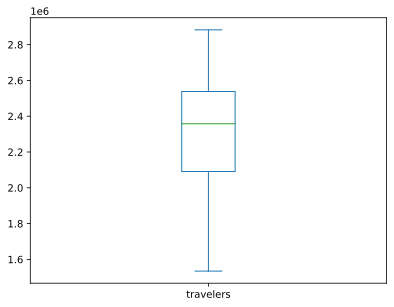

In [16]:
import pandas as pd
import matplotlib_inline
from utils import mpl_svg_config

matplotlib_inline.backend_inline.set_matplotlib_formats(
    'svg', 
    **mpl_svg_config('section-3') 

)

df = pd.read_csv('../data/tsa_melted_holiday_travel.csv',parse_dates=True, index_col='date')

box2019 = df.query('year == 2019').travelers.plot(kind='box')

#box2020 = df.query('year == 2020').travelers.plot(kind='box')

#box2021 = df.query('year == 2021').travelers.plot(kind='box')


#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

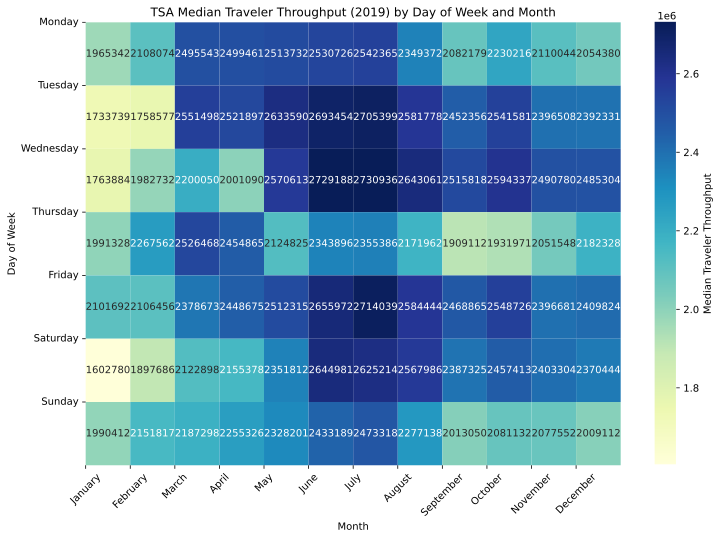

In [18]:
import pandas as pd
import matplotlib_inline
from utils import mpl_svg_config
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib_inline.backend_inline.set_matplotlib_formats(
    'svg', # output images using SVG format
    **mpl_svg_config('section-3') # optional: configure metadata

)



# Load the TSA traveler throughput data
df = pd.read_csv('../data/tsa_melted_holiday_travel.csv', parse_dates=True, index_col='date')

# Extract year, month, and day of week from the 'date' column
df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek

df_2019 = df[df['Year'] == 2019]

pivot_table = pd.pivot_table(df_2019, values='travelers', index='DayOfWeek', columns='Month', aggfunc='median')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Median Traveler Throughput'})
plt.title('TSA Median Traveler Throughput (2019) by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')

plt.xticks(ticks=range(12), labels=month_order, rotation=45)
plt.yticks(ticks=range(7), labels=day_order, rotation=0)

plt.show()

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

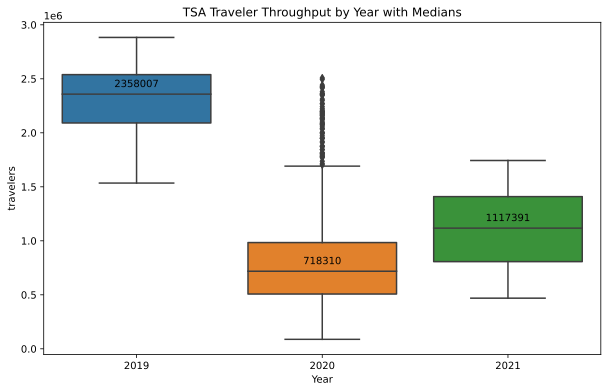

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/tsa_melted_holiday_travel.csv')

df['date'] = pd.to_datetime(df['date'])

df['Year'] = df['date'].dt.year

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Year', y='travelers', data=df)

medians = df.groupby(['Year'])['travelers'].median()

for x_tick, (year, median) in enumerate(medians.items()):
    ax.annotate(f'{median:.0f}', xy=(x_tick, median), 
                xytext=(0,5), 
                textcoords='offset points', 
                ha='center', va='bottom')

plt.title('TSA Traveler Throughput by Year with Medians')
plt.show()
